<div style="text-align:center">
<img src="img/pac-man-liste1.jpg">
</div>

# <b>Introduction</b>

Another option for performing optimizations than the linear and non linear optimizations, is to use three types of algorithms: greedy algorithms, divide-and-conquer algorithms, and dynamic programming.

In this notebook, I will use the basic ones and provide a basical study.

** CREATION IN PROGRESS **

# <b> Summary </b>

1. <b> Greedy algorithms </b>
    - 1.1 Introduction and good and bad points
    - 1.2 Coin Change making
        - 1.2.1 Abstract
        - 1.2.2 Instance
        - 1.2.3 Greedy schedule
        - 1.2.4 Greedy code
        - 1.2.5 Dynamic programming schedule
        - 1.2.6 Dynamic programming code

    - 1.3 Activity Selection Problem
        - 1.3.1 Abstract
        - 1.3.2 Instance
        - 1.3.3 Algorithm scheduling
        - 1.3.4 Code
    - 1.4 Job Sequencing with deadlines
        - 1.4.1 Abstract
        - 1.4.2 Code
    - 1.5 Job Sequencing with deadlines and profit
        - 1.5.1 Abstract
        - 1.5.2 Instance
        - 1.5.3 Algorithm scheduling
        - 1.5.3 Code
        - 1.5.4 Instance
        - 1.5.5 Code
        - 1.5.6 Code
    - 1.6 Minimum product subset of an array
        - 1.6.1 Abstract
        - 1.6.2 Code
    - 1.7 Fractional knapsack
        - 1.7.1 Abstract
        - 1.7.2 Instance
        - 1.7.3 Algorithm schedule
        - 1.7.4 Code
    - 1.8 Traveling salesman
        - 1.8.1 Abstract
        - 1.8.2 Instance
        - 1.8.3 Solve using NetworkX
        - 1.8.4 Algorithm schedule
        - 1.8.5 Code
    - 1.9 Djikstra’s Shortest Path Algorithm
        - 1.9.1 Abstract
        - 1.9.2 Instance
            - Solve using NetworkX Djikstra
            - Solve using NetworkX Bellman
        - 1.9.4 Algorithm schedule
        - 1.9.5 Code
    - 1.10 Minimal spanning tree Algorithm
        - 1.10.1 Abstract
        - 1.10.2 Instance
            - Solve using NetworkX 
        - 1.10.4 Algorithm schedule
        - 1.10.5 Code
    - 1.11 Load balancing
        - 1.11.1 Abstract
        - 1.11.2 Instance : Applying Load Balancing to some teams
        - 1.11.4 Algorithm schedule
        - 1.11.5 Code



# <b> 1.2 Coin change making </b>

<div style="text-align:center">
<img src="img/coins.png" width="500"/>
</div>

## <b> 1.2.2 Abstract</b>
The problem is to find the minimum number of coins for making the change of a given amount of money.
- Given a array D of m coins denominations {1,2,10}. <br>

We need to find an array S having a minimum number of coins that add up to a given amount of money .

Link :  https://en.wikipedia.org/wiki/Change-making_problem

## <b> 1.2.3 Instance</b>
<table  align="center">
   <tr>
      <td>Coins type</td>
      <td>1,2,10</td>
      <td>Name in the program : D[i] array</td>
   </tr>
   <tr>
   <td>Amount to be returned</td>
      <td>15</td>
         <td>Name in the program : n</td>
   </tr>
      <td>Solution</td>
      <td>10,2,2,1</td>
      <td>Name in the program : S[] array</td>

   </tr>

</table>

## <b> 1.2.3 Greedy schedule</b>

<b>Step 1</b>
Sort the coins denominations array ASC called D[]

<b>Step 2</b>
Select coin D[i] ∈ D with the largest denomination such as n >= D[i]

<b>Step 3</b>
Add D[i] to the S[] solutions array

<b>Step 4</b>
Substract the D[i] value from n

<b>Step 5 </b>
Repeat the process untill n = 0

Link :  https://www.baeldung.com/cs/min-number-of-coins-algorithm


## <b> 1.2.4 Greedy Code</b>

Source : https://github.com/breezy-codes/Greedy-Algorithm/tree/main

In [154]:
def find_min_coins(denominations, amount):
    denominations.sort(reverse=True)
    coin_count = 0
    coin_used = []

    for coin in denominations:
        while amount >= coin:
            amount -= coin
            coin_count += 1
            coin_used.append(coin)

    return coin_count, coin_used


denominations = [1,2,10]
amount = 15
coins_needed, coins_used = find_min_coins(denominations, amount)
print(f"Total coins needed: {coins_needed}")
print(f"Coins used: {coins_used}")

Total coins needed: 4
Coins used: [10, 2, 2, 1]


Let's use the wikipedia variables names :

In [155]:
def find_min_coins(D, n):
    D.sort(reverse=True)
    coin_count = 0
    S = []

    for i in D:
        while n >= i:
            n -= i
            coin_count += 1
            S.append(i)

    return coin_count, S


D = [1,2,10]
n = 15

coin_count, S = find_min_coins(D,n)
print(f"Total coins needed: {coin_count}")
print(f"Coins used: {S}")

Total coins needed: 4
Coins used: [10, 2, 2, 1]


# <b> 1.3 Activity selection problem </b>

<div style="text-align:center">
<img src="img/activity.jpg" width="500"/>
</div>

## <b> 1.3.1 Abstract </b>

Wikipedia quote : 
The activity selection problem is a combinatorial optimization problem concerning the selection of non-conflicting activities to perform within a given time frame, given a set of activities each marked by a start time (si) and finish time (fi). The problem is to select the maximum number of activities that can be performed by a single person or machine, assuming that a person can only work on a single activity at a time. 


Following are some of the real-life applications of this problem:

    Scheduling multiple competing events in a room, such that each event has its own start and end time.
    Scheduling manufacturing of multiple products on the same machine, such that each product has its own production timelines.
    Activity Selection is one of the most well-known generic problems used in Operations Research for dealing with real-life business problems.

Link :  https://en.wikipedia.org/wiki/Activity_selection_problem

## <b> 1.3.2 Instance </b>

<table  align="center">
   <tr>
      <td>Activity Name</td>
      <td>Start Time (s)</td>
      <td>Finish Time (f)  </td>
   </tr>
   <tr>
      <td>a1</td>
      <td>5</td>
      <td>9</td>
   </tr>
   <tr>
      <td>a2</td>
      <td>1</td>
      <td>2</td>
   </tr>
   <tr>
      <td>a3</td>
      <td>3</td>
      <td>4</td>
   </tr>
   <tr>
      <td>a4</td>
      <td>0</td>
      <td>6</td>
   </tr>
   <tr>
      <td>a5</td>
      <td>5</td>
      <td>7</td>
   </tr>
   <tr>
      <td>a6</td>
      <td>8</td>
      <td>9</td>
   </tr>
</table>

Link : https://www.studytonight.com/data-structures/activity-selection-problem

## <b>1.3.3 Code </b>


In [156]:

"""Prints a maximum set of activities that can be done by a
single person, one at a time"""
# n --> Total number of activities
# s[]--> An array that contains start time of all activities
# f[] --> An array that contains finish time of all activities
# a[] --> An array that contains activities names

# -----------------------------------
# Instance 
# -----------------------------------
s = [5, 1, 3, 0, 5, 8]
f = [9, 2, 4, 6, 7, 9]
a = ["a1", "a2", "a3", "a4", "a5", "a6"]

# -----------------------------------
# Greedy algo
# -----------------------------------
# Sort 3 separated arrays by finish time
def sort(s,f,a):
    f, s , a = (list(t) for t in zip(*sorted(zip(f, s, a))))
    return s,f,a

def printMaxActivities(s, f):
    n = len(f)
    order = []

    # The first activity is always selected
    i = 0
    order.append(i) 

    # Consider rest of the activities
    for j in range(n):

        # If this activity has start time greater than
        # or equal to the finish time of previously
        # selected activity, then select it
        if s[j] >= f[i]:
            order.append(j) 
            i = j
    return order

def printOrderedActivitiesNames(a,order):
    print( " Please execute activities in the following order :")
    for j in order:
        print(a[j])
    

# -----------------------------------
# Executing algo
# -----------------------------------

s,f,a = sort(s,f,a)
order = printMaxActivities(s,f)
printOrderedActivitiesNames(a,order)

# This code is contributed by Nikhil Kumar Singh
# Sort function by estelle derrien

 Please execute activities in the following order :
a2
a3
a5
a6


## <b> 1.3.4 Greedy schedule</b>

Comin' soon

# <b> 1.5 Jobs sequencing with deadlines and profits</b>

<div style="text-align:center">
<img src="img/sequencing.avif" width="500"/>
</div>


# <b> 1.5.1 Abstract</b>
The problem involves scheduling a set of jobs on a single processor to maximize total profit where each job has a deadline and profit.

Given two arrays: deadline[] and profit[], where the index of deadline[] represents a job ID, and deadline[i] denotes the deadline for that job and profit[i] represents profit of doing ith job. <b> Each job takes exactly one unit of time to complete</b>, and only one job can be scheduled at a time. A job earns its corresponding profit only if it is completed within its deadline.

# <b> 1.5.2 Instance</b>

<table  align="center">
   <tr>
      <td>Activity Name</td>
      <td>Deadline</td>
      <td>Profit </td>
   </tr>
   <tr>
      <td>1</td>
      <td>4</td>
      <td>20</td>
   </tr>
   <tr>
      <td>2</td>
      <td>1</td>
      <td>10</td>
   </tr>
   <tr>
      <td>3</td>
      <td>1</td>
      <td>40</td>
   </tr>
   <tr>
      <td>4</td>
      <td>1</td>
      <td>30</td>
   </tr>
  
</table>



# <b> 1.5.3 Code </b>

Provided by https://www.tutorialspoint.com/data_structures_algorithms/job_sequencing_with_deadline.htm

Note : I don't know why there is a t variable, and why I have to guess its value, currently reviewing.

In [157]:

# -----------------------------------
# Instance 
# -----------------------------------
arr = [
    ['1', 4, 20], 
    ['2', 1, 10], 
    ['3', 1, 40], 
    ['4', 1, 30], 
    ]

# -----------------------------------
# Greedy algo
# -----------------------------------
print("Following is maximum profit sequence of Jobs: ")
# length of array
n = len(arr)
t = 2
# Sort all jobs according to
# decreasing order of profit
for i in range(n):
   for j in range(n - 1 - i):
     if arr[j][2] < arr[j + 1][2]:
       arr[j], arr[j + 1] = arr[j + 1], arr[j]

# To keep track of free time slots
result = [False] * t

# To store result (Sequence of jobs)
job = ['-1'] * t

# Iterate through all given jobs
for i in range(len(arr)):

   # Find a free slot for this job
   # (Note that we start from the
   # last possible slot)
   for j in range(min(t - 1, arr[i][1] - 1), -1, -1):

     # Free slot found
     if result[j] is False:
       result[j] = True
       job[j] = arr[i][0]
       break

# print the sequence
print(job)

Following is maximum profit sequence of Jobs: 
['3', '1']


The https://www.geeksforgeeks.org/dsa/job-sequencing-problem/ code has no t variable and provides a good solution.

In [158]:
# -----------------------------------
# Instance 
# -----------------------------------
def instance():
    deadline = [4, 1, 1, 1]
    profit = [20, 10, 40, 30]
    ans = jobSequencing(deadline, profit)
    print("Resume :")
    print("Number of picked jobs :", ans[0],", Earned maximum profit :" , ans[1] ,"$")
    print()

# -----------------------------------
# Greedy algo 
# -----------------------------------
def jobSequencing(deadline, profit):
    n = len(deadline)
    
    # total job count which is done
    cnt = 0
    
    # total profit earned
    totProfit = 0

    # pair the profit and deadline of
    # all the jos together and sort it in decreasing order 
    jobs = sorted(zip(profit, deadline), reverse=True)
    print("Ordered jobs by ASC profit:", jobs)
    print("Solution :")

    # array to check time slot for job
    slot = [0] * n

    for i in range(n):
        start = min(n, jobs[i][1]) - 1 # starting the by first ordered job

        for j in range(start, -1, -1):

            # if slot is empty
            if slot[j] == 0:
                slot[j] = 1
                cnt += 1
                totProfit += jobs[i][0]
                print(cnt, "Execute job : ", jobs[i], "at index:", jobs.index(jobs[i]))
                break
    
    return [cnt, totProfit]


instance()


Ordered jobs by ASC profit: [(40, 1), (30, 1), (20, 4), (10, 1)]
Solution :
1 Execute job :  (40, 1) at index: 0
2 Execute job :  (20, 4) at index: 2
Resume :
Number of picked jobs : 2 , Earned maximum profit : 60 $



# <b> 1.5.4 Instance</b>

<table  align="center">
   <tr>
      <td>Activity Name</td>
      <td>Deadline</td>
      <td>Profit </td>
   </tr>
   <tr>
      <td>1</td>
      <td>2</td>
      <td>100</td>
   </tr>
   <tr>
      <td>2</td>
      <td>1</td>
      <td>19</td>
   </tr>
   <tr>
      <td>3</td>
      <td>2</td>
      <td>27</td>
   </tr>
   <tr>
      <td>4</td>
      <td>1</td>
      <td>25</td>
   </tr>
     <tr>
      <td>5</td>
      <td>1</td>
      <td>15</td>
   </tr>
  
</table>



# <b> 1.5.5 Code</b>

In [159]:
# -----------------------------------
# Instance 
# -----------------------------------
def instance():
    deadline = [2, 1, 2, 1, 1]
    profit = [100, 19, 27, 25,15]
    ans = jobSequencing(deadline, profit)
    print("Resume :")
    print("Number of picked jobs :", ans[0],", Earned maximum profit :" , ans[1] ,"$")
    print()

# -----------------------------------
# Greedy algo
# -----------------------------------
def jobSequencing(deadline, profit):
    n = len(deadline)
    
    # total job count which is done
    cnt = 0
    
    # total profit earned
    totProfit = 0

    # pair the profit and deadline of
    # all the jos together and sort it in decreasing order 
    jobs = sorted(zip(profit, deadline), reverse=True)
    print("Ordered jobs by ASC profit: ", jobs)
    print("Solution :")

    # array to check time slot for job
    slot = [0] * n

    for i in range(n):
        start = min(n, jobs[i][1]) - 1 # starting the by first ordered job

        for j in range(start, -1, -1):

            # if slot is empty
            if slot[j] == 0:
                slot[j] = 1
                cnt += 1
                totProfit += jobs[i][0]
                print(cnt, "Execute job : ", jobs[i], "at index:", jobs.index(jobs[i]))
                break
    
    return [cnt, totProfit]

instance()


Ordered jobs by ASC profit:  [(100, 2), (27, 2), (25, 1), (19, 1), (15, 1)]
Solution :
1 Execute job :  (100, 2) at index: 0
2 Execute job :  (27, 2) at index: 1
Resume :
Number of picked jobs : 2 , Earned maximum profit : 127 $



# <b> 1.5.6 Code</b>
Testing the https://www.techgeekbuzz.com/blog/job-sequencing-problem/ code, with the same data.


In [160]:
# -----------------------------------
# Instance 
# -----------------------------------
arr = [[1, 2, 100],
 [2, 1, 19],
 [3, 2, 27],
 [4, 1, 25],
 [5, 1, 15]]

# -----------------------------------
# Greedy algo
# -----------------------------------

def solve(arr, t):
    n = len(arr)
    for i in range(n):
        for j in range(n - 1 - i):
            if arr[j][2] < arr[j + 1][2]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                result = [False] * t
                ans = ['-1'] * t
                for i in range(len(arr)):
                    for j in range(min(t - 1, arr[i][1] - 1), -1, -1):
                        if result[j] is False:
                            result[j] = True
                            ans[j] = arr[i][0]
                            break
    print(ans)

print("Maximum profit sequence of jobs")
solve(arr, 2) 

Maximum profit sequence of jobs
[3, 1]


## <b> 1.5.7 Greedy schedule</b>

Comin' soon

# <b> 1.7 Fractional knapsack</b>


<div style="text-align:center">
<img src="img/objective-of-the-knapsack-problem-4-1674054631.webp" width="500"/>
</div>

Image credit : https://www.naukri.com/

## <b> 1.7.1 Abstract </b>

The weight of N items and their corresponding values are given. 

We have to put these items in a knapsack of weight W such that the total value obtained is maximized.

Note: We can either take the item as a whole or break it into smaller units.

## <b> 1.7.2 Instance </b>

 <table  align="center">
   
   <tr>
   <td>Item</td>
      <td>1</td>
      <td>2</td>
      <td>3</td>
   </tr>
   <tr>
     <td>Value ($)</td>
      <td>60</td>
      <td>100</td>
      <td>120</td>
   </tr>
   <tr>
   <td>Weight (kgs)</td>
      <td>10</td>
      <td>20</td>
      <td>30</td>
   </tr>
</table>
<br>
 <table  align="center">
   <tr>
      <td>Max Bag capacity</td>
   </tr>
   <tr>
      <td>50</td>

   </tr>
  
</table>

## <b> 1.7.3 Greedy schedule</b>

- Sort the given array of items according to weight / value(W /V) ratio in descending order.
- Start adding the item with the maximum W / V ratio.
- Add the whole item, if the current weight is less than the capacity, else, add a portion of the item to the knapsack.
- Stop, when all the items have been considered and the total weight becomes equal to the weight of the given knapsack.

## <b> 1.7.4 Code </b>

Source : https://www.geeksforgeeks.org/dsa/fractional-knapsack-problem/

In [161]:
# -----------------------------------
# Instance 
# -----------------------------------
def instance():
    values      =  [60,100,120]
    weights     =  [10,20,30]
    capacity    =  50
    return values,weights,capacity

# -----------------------------------
# Greedy algorithm
# -----------------------------------
def fractionalKnapsack(val, wt, capacity):
    n = len(val)

    # Create list to store value and weight
    # items[i][0] = value, items[i][1] = weight
    items = [[val[i], wt[i]] for i in range(n)]

    # Sort items based on value-to-weight ratio in descending order
    items.sort(key=lambda x: x[0]/x[1], reverse=True)

    res = 0.0
    currentCapacity = capacity
    stored_items = []

    # Process items in sorted order
    for i in range(n):

        # If we can take the entire item
        if items[i][1] <= currentCapacity:
            res += items[i][0]

            currentCapacity -= items[i][1]

        # Otherwise take a fraction of the item
        else:
            res += (1.0 * items[i][0] / items[i][1]) * currentCapacity

            # Knapsack is full
            break

    return res


values,weights,capacity = instance()
res = fractionalKnapsack(values, weights, capacity)

print("Maximized knapsack value")
print(res,"$")


Maximized knapsack value
240.0 $


Now, I want the fractional knapsack picked items list :

In [162]:
# -----------------------------------
# Instance 
# -----------------------------------
def instance():
    values      =  [60,100,120]
    weights     =  [10,20,30]
    capacity    =  50
    return values,weights,capacity

# -----------------------------------
# Greedy algorithm
# -----------------------------------
def fractionalKnapsack(val, wt, capacity):
    n = len(val)

    # Create list to store value and weight
    # items[i][0] = value, items[i][1] = weight
    items = [[val[i], wt[i]] for i in range(n)]

    # Sort items based on value-to-weight ratio in descending order
    items.sort(key=lambda x: x[0]/x[1], reverse=True)

    

    res = 0.0
    currentCapacity = capacity
    stored_items = []

    # Process items in sorted order
    for idx,i in enumerate(range(n)):
        

        # If we can take the entire item
        if items[i][1] <= currentCapacity:
            res += items[i][0]
            stored_items += "pick 1 complete item with index:",str(idx) 
            currentCapacity -= items[i][1]

        # Otherwise take a fraction of the item
        else:
            res += (1.0 * items[i][0] / items[i][1]) * currentCapacity
            stored_items += "pick a ", (1.0 * items[i][0] / items[i][1]) * currentCapacity,"% fraction of item with index:" " of",str(idx)
            # Knapsack is full
            break

    return res,stored_items,items


values,weights,capacity = instance()
res,stored_items,items = fractionalKnapsack(values, weights, capacity)

print("Maximized knapsack value")
print(res,"$")

print("Picked items list by indexes")
print(stored_items)

print("inside of the weight / value(W /V) ratio in descending order ordered items list :")
print(items)   


Maximized knapsack value
240.0 $
Picked items list by indexes
['pick 1 complete item with index:', '0', 'pick 1 complete item with index:', '1', 'pick a ', 80.0, '% fraction of item with index: of', '2']
inside of the weight / value(W /V) ratio in descending order ordered items list :
[[60, 10], [100, 20], [120, 30]]


# <b>1.8 Traveling salesman </b>

Coming tomorrow 
https://networkx.org/documentation/stable/auto_examples/drawing/plot_tsp.html

# <b>1.9 Djikstra’s Shortest Path Algorithm </b>

<div style="text-align:center">
<img src="img/dijkstra-diagram.png" width="500"/>
</div>

## <b>1.9.1 Abstract</b>

Dijkstra's algorithm is an algorithm for finding the shortest paths between nodes in a weighted graph, which may represent, for example, a road network.

## <b>1.9.2 Instance</b>
I am using networkX to draw my road network instance : 
The minimal cost road solution from b to e is obvious : [b,a,c,e]

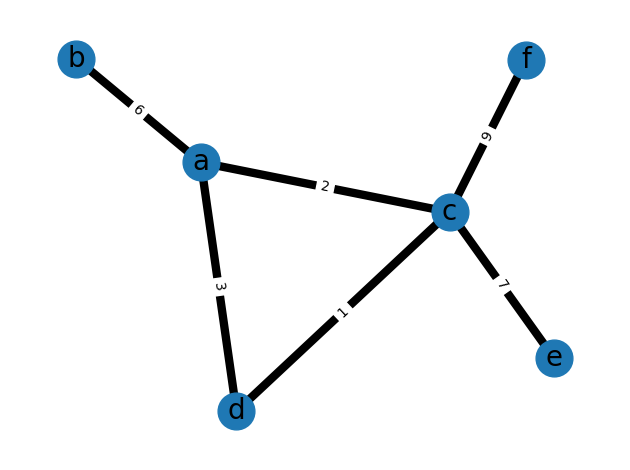

In [163]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=6)
G.add_edge("a", "c", weight=2)
G.add_edge("c", "d", weight=1)
G.add_edge("c", "e", weight=7)
G.add_edge("c", "f", weight=9)
G.add_edge("a", "d", weight=3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

## <b> Solve using Djikstra</b>

I need the shortest path between b and e :

In [164]:
print("Path to follow")
nx.dijkstra_path(G, "b", "e")

Path to follow


['b', 'a', 'c', 'e']

In [165]:
print("Minimal Distance")
nx.dijkstra_path_length(G, "b", "e")

Minimal Distance


15

## <b> Solve using Bellman</b>

I need the shortest path between b and e :

In [166]:
nx.bellman_ford_path(G, "b", "e")

['b', 'a', 'c', 'e']

## <b>1.9.4 Algorithm schedule</b>

Now, I want to use a greedy algorithm, instead of the networkX library, wishing to compare the solutions.

Comin soon

## <b>1.9.5 Code</b>

Source Link / Author : https://www.pythonpool.com/dijkstras-algorithm-python/

In [167]:
# -----------------------------------
# Instance 
# -----------------------------------
def instance():
    nodes = ('a', 'b', 'c', 'd', 'e','f')
    distances = {
        'a': {'b':6,'c': 2,'d':3},
        'b': {'a':6},
        'c': {'a':2,'d':1,'f': 9,'e': 7},
        'd': {'a':3,'c': 1},
        'e': {'c': 7},
        'f': {'c': 9},
    }
    current = 'b'
    return nodes,distances,current

# -----------------------------------
# Djikstra greedy algo
# -----------------------------------
def dijkstra(current, nodes, distances):
    # These are all the nodes which have not been visited yet
    unvisited = {node: None for node in nodes}
    # It will store the shortest distance from one node to another
    visited = {}
    # It will store the predecessors of the nodes
    currentDistance = 0
    unvisited[current] = currentDistance
    # Running the loop while all the nodes have been visited
    while True:
        # iterating through all the unvisited node
        for neighbour, distance in distances[current].items():
            # Iterating through the connected nodes of current_node (for 
            # example, a is connected with b and c having values 10 and 3
            # respectively) and the weight of the edges
            if neighbour not in unvisited: continue
            newDistance = currentDistance + distance
            if unvisited[neighbour] is None or unvisited[neighbour] > newDistance:
                unvisited[neighbour] = newDistance
        # Till now the shortest distance between the source node and target node 
        # has been found. Set the current node as the target node
        visited[current] = currentDistance
        del unvisited[current]
        if not unvisited: break
        candidates = [node for node in unvisited.items() if node[1]]
        print(sorted(candidates, key = lambda x: x[1]))
        current, currentDistance = sorted(candidates, key = lambda x: x[1])[0]
    return visited
  

nodes,distances,current = instance()
print(dijkstra(current, nodes, distances))

[('a', 6)]
[('c', 8), ('d', 9)]
[('d', 9), ('e', 15), ('f', 17)]
[('e', 15), ('f', 17)]
[('f', 17)]
{'b': 0, 'a': 6, 'c': 8, 'd': 9, 'e': 15, 'f': 17}


Looking at the solution , going from b to e minimal value is 15, and b to f is 17, looking good !

   # <b>1.11 Load balancing</b>


<div style="text-align:center">
<img src="img/business-team-meeting-boardroom.jpg" width="500"/>
</div>
    
## 1.11.1 Abstract
The goal is to <b>fairly</b> allocate jobs to machines . The term machine can apply to a team of people for example.

Link to Load Balancer types: https://www.geeksforgeeks.org/system-design/load-balancing-algorithms/

## 1.11.2 Instance : Applying Load Balancing to some teams

I have 3 teams, and 7 jobs to do, let's load balance jobs between teams.


## 1.11.4 Algorithm schedule

Comin soon

## 1.11.5 Code : Least Connection Method Load Balancing Algorithm 

In [ ]:
class LeastConnectionLoadBalancer:
    def __init__(self):
        self.server_connections = {}

    def add_server(self, server_name):
        # Add a server to the load balancer with 0 initial connections
        self.server_connections[server_name] = 0

    def get_server_with_least_connections(self):
        # Find the server with the least active connections
        min_connections = float('inf')
        selected_server = None

        for server, connections in self.server_connections.items():
            if connections < min_connections:
                min_connections = connections
                selected_server = server

        # Increment the connection count for the selected server
        if selected_server is not None:
            self.server_connections[selected_server] = min_connections + 1
            print ('Realtime Teams connections reminder ' ,self.server_connections)

        return selected_server


if __name__ == '__main__':
    # Create a Least Connection load balancer
    load_balancer = LeastConnectionLoadBalancer()

    # Add servers to the load balancer
    load_balancer.add_server('Team1')
    load_balancer.add_server('Team2')
    load_balancer.add_server('Team3')

    # Simulate requests and print the server to which each request is routed 
    myJobsList = {1:'Wash cars',
                 2:'Sort cars',
                 3:'Compute',
                 4:'Go to company A',
                 5:'Store tools',
                 6:'Repair furnitures',
                 7:'Customers communication'
                 }


    for i in myJobsList:
        selected_server = load_balancer.get_server_with_least_connections()
        print(f'Request {i } - {myJobsList[i ]}: Routed to {selected_server}')

Teams connections reminder  {'Team1': 1, 'Team2': 0, 'Team3': 0}
Request 1 - Wash cars: Routed to Team1
Teams connections reminder  {'Team1': 1, 'Team2': 1, 'Team3': 0}
Request 2 - Sort cars: Routed to Team2
Teams connections reminder  {'Team1': 1, 'Team2': 1, 'Team3': 1}
Request 3 - Compute: Routed to Team3
Teams connections reminder  {'Team1': 2, 'Team2': 1, 'Team3': 1}
Request 4 - Go to company A: Routed to Team1
Teams connections reminder  {'Team1': 2, 'Team2': 2, 'Team3': 1}
Request 5 - Store tools: Routed to Team2
Teams connections reminder  {'Team1': 2, 'Team2': 2, 'Team3': 2}
Request 6 - Repair furnitures: Routed to Team3
Teams connections reminder  {'Team1': 3, 'Team2': 2, 'Team3': 2}
Request 7 - Customers communication: Routed to Team1


2 questions : 

Now, what if any team performs smarter than another one, should we assign it a job in priority ?

Now, what if any job has a particular importance, that we can call " weight" ?